In [3]:
import pandas_datareader as pdr

In [4]:
df=pdr.get_data_tiingo('GOOG', api_key='38d2fe81e8392585c3817ece17c66e19c364b1c6')

C:\Users\HP\anaconda\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [5]:
df.to_csv('GOOG.csv')

In [212]:
df.tail()


close       high        low     open  \
symbol date                                                                
GOOG   2022-07-01 00:00:00+00:00  2181.62  2196.1273  2142.1000  2166.74   
       2022-07-05 00:00:00+00:00  2277.74  2281.0516  2124.9901  2150.29   
       2022-07-06 00:00:00+00:00  2304.27  2327.0400  2245.0100  2281.84   
       2022-07-07 00:00:00+00:00  2386.12  2397.2399  2310.6800  2320.16   
       2022-07-08 00:00:00+00:00  2403.37  2408.7000  2350.2800  2351.00   

                                   volume  adjClose    adjHigh     adjLow  \
symbol date                                                                 
GOOG   2022-07-01 00:00:00+00:00  1551394   2181.62  2196.1273  2142.1000   
       2022-07-05 00:00:00+00:00  1821469   2277.74  2281.0516  2124.9901   
       2022-07-06 00:00:00+00:00  1442634   2304.27  2327.0400  2245.0100   
       2022-07-07 00:00:00+00:00  1609197   2386.12  2397.2399  2310.6800   
       2022-07-08 00:00:00+00:00  1454110   2403.37  2408.7000  2350.2800   

                                  adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                 
GOOG   2022-07-01 00:00:00+00:00  2166.74    1551394      0.0          1.0  
       2022-07-05 00:00:00+00:00  2150.29    1821469      0.0          1.0  
       2022-07-06 00:00:00+00:00  2281.84    1442634      0.0          1.0  
       2022-07-07 00:00:00+00:00  2320.16    1609197      0.0          1.0  
       2022-07-08 00:00:00+00:00  2351.00    1454110      0.0          1.0

In [9]:
df.shape

(1258, 12)

In [10]:
df1 = df.reset_index()['close']

In [12]:
df1.shape

(1258,)

In [13]:
df1.head()

0    930.09
1    943.83
2    947.16
3    955.99
4    953.42
Name: close, dtype: float64

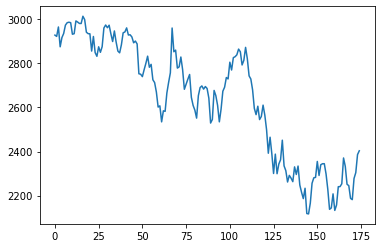

In [226]:
plt.plot(scaler.inverse_transform(df1[1083:]))

In [15]:
import matplotlib.pyplot as plt

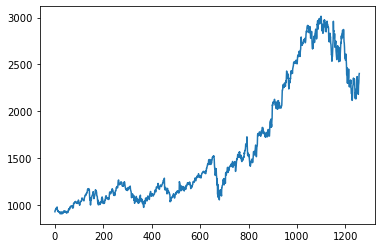

In [16]:
plt.plot(df1)

In [17]:
#LSTM is sensitive to scale and so we change the data to between 0 and 1 using MinMaxScaler

In [23]:
import numpy as np

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1= scaler.fit_transform(np.array(df1).reshape(-1,1))

In [30]:
df1

array([[0.01111733],
       [0.01763684],
       [0.0192169 ],
       ...,
       [0.66315385],
       [0.70199097],
       [0.71017594]])

In [31]:
df1.max()

0.9999999999999999

In [32]:
df1.min()

0.0

In [33]:
df1.shape

(1258, 1)

In [34]:
# collection of data is done

In [35]:
#stock data is time series data and so for testing and training split, we should take time series data only 

In [36]:
train_size= int(len(df1)*0.65)

In [37]:
test_size= len(df1)-train_size

In [38]:
test_size

441

In [39]:
train_data,test_data = df1[:train_size,:], df1[train_size:,:]

In [40]:
len(train_data)

817

In [42]:
len(test_data)

441

In [64]:
import numpy as np
def create_dataset(dataset,time_step):
    X=[]
    Y=[]
    for i in range(len(dataset)-time_step):
        a=dataset[i:i+time_step,0]
        b=dataset[i+time_step,0]
        X.append(a)
        Y.append(b)
    return np.array(X),np.array(Y)
    

In [165]:
time_step=75
X_train,Y_train=create_dataset(train_data,time_step)

In [166]:
X_test,Y_test=create_dataset(test_data,time_step)

In [167]:
X_train[0][7]

0.029176472821135724

In [168]:
X_train

array([[0.01111733, 0.01763684, 0.0192169 , ..., 0.03869002, 0.02931882,
        0.03031051],
       [0.01763684, 0.0192169 , 0.02340666, ..., 0.02931882, 0.03031051,
        0.03163434],
       [0.0192169 , 0.02340666, 0.02218722, ..., 0.03031051, 0.03163434,
        0.03126898],
       ...,
       [0.25834156, 0.25114827, 0.24913643, ..., 0.26698205, 0.26711016,
        0.27683249],
       [0.25114827, 0.24913643, 0.25869268, ..., 0.26711016, 0.27683249,
        0.26180534],
       [0.24913643, 0.25869268, 0.26464755, ..., 0.27683249, 0.26180534,
        0.27490131]])

In [170]:
Y_train[0]

0.031634337989675076

In [171]:
X_train.shape

(742, 75)

In [172]:
Y_train.shape

(742,)

In [76]:
X_test.shape

(366, 75)

In [77]:
#now the we have completed spliting the data into train set and test set
#lstm requires 3 inputs (samples, time steps, features)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [78]:
X_train.shape

(742, 75, 1)

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM



In [89]:
model=Sequential()
model.add(LSTM(50,return_sequences= True, input_shape=(75,1)))
model.add(LSTM(50,return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
          

In [90]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 75, 50)            10400     
                                                                 
 lstm_11 (LSTM)              (None, 75, 50)            20200     
                                                                 
 lstm_12 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=90,batch_size=64,verbose=1)

Epoch 1/90
12/12 [==============================] - 9s 270ms/step - loss: 0.0081 - val_loss: 0.1722
Epoch 2/90
12/12 [==============================] - 1s 113ms/step - loss: 0.0024 - val_loss: 0.0322
Epoch 3/90
12/12 [==============================] - 2s 143ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 4/90
12/12 [==============================] - 1s 113ms/step - loss: 7.8806e-04 - val_loss: 0.0035
Epoch 5/90
12/12 [==============================] - 1s 113ms/step - loss: 7.1008e-04 - val_loss: 0.0059
Epoch 6/90
12/12 [==============================] - 2s 132ms/step - loss: 6.7100e-04 - val_loss: 0.0041
Epoch 7/90
12/12 [==============================] - 1s 121ms/step - loss: 6.3120e-04 - val_loss: 0.0029
Epoch 8/90
12/12 [==============================] - 2s 138ms/step - loss: 5.9599e-04 - val_loss: 0.0034
Epoch 9/90
12/12 [==============================] - 2s 136ms/step - loss: 5.8567e-04 - val_loss: 0.0048
Epoch 10/90
12/12 [==============================] - 2s 126ms/step - loss: 5

12/12 [==============================] - 2s 128ms/step - loss: 1.8650e-04 - val_loss: 0.0017
Epoch 80/90
12/12 [==============================] - 2s 129ms/step - loss: 1.8594e-04 - val_loss: 0.0011
Epoch 81/90
12/12 [==============================] - 2s 134ms/step - loss: 1.8419e-04 - val_loss: 0.0033
Epoch 82/90
12/12 [==============================] - 2s 129ms/step - loss: 1.7573e-04 - val_loss: 0.0016
Epoch 83/90
12/12 [==============================] - 2s 130ms/step - loss: 1.7461e-04 - val_loss: 0.0039
Epoch 84/90
12/12 [==============================] - 2s 128ms/step - loss: 1.6958e-04 - val_loss: 0.0023
Epoch 85/90
12/12 [==============================] - 2s 131ms/step - loss: 1.7167e-04 - val_loss: 0.0023
Epoch 86/90
12/12 [==============================] - 2s 130ms/step - loss: 1.6689e-04 - val_loss: 0.0011
Epoch 87/90
12/12 [==============================] - 2s 131ms/step - loss: 1.6368e-04 - val_loss: 0.0034
Epoch 88/90
12/12 [==============================] - 2s 130ms/step 

In [ ]:
#do the prediction and check the performance matrix


In [143]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

12/12 [==============================] - 0s 28ms/step


In [173]:
Y_traint=[]
for i in range(len(Y_train)):
    Y_traint.append([Y_train[i]])
Y_traint = np.array(Y_traint)
Y_train=Y_traint

Y_testt=[]
for i in range(len(Y_test)):
    Y_testt.append([Y_test[i]])
Y_testt = np.array(Y_testt)
Y_test=Y_testt

In [174]:
Y_test.shape

(366, 1)

In [146]:
train_predict

array([[0.03713697],
       [0.03559125],
       [0.03500518],
       [0.03973663],
       [0.04634029],
       [0.05174938],
       [0.05575107],
       [0.05805156],
       [0.05963945],
       [0.0599263 ],
       [0.06026508],
       [0.06149063],
       [0.06209529],
       [0.06179306],
       [0.0609345 ],
       [0.06017978],
       [0.05926478],
       [0.05977564],
       [0.05962718],
       [0.05887083],
       [0.05977057],
       [0.06168292],
       [0.06400421],
       [0.06733299],
       [0.06961063],
       [0.06766456],
       [0.063765  ],
       [0.05901228],
       [0.05398427],
       [0.0508932 ],
       [0.05121605],
       [0.05464348],
       [0.05934078],
       [0.06366366],
       [0.06639814],
       [0.06748   ],
       [0.0683798 ],
       [0.07079665],
       [0.07500172],
       [0.07832328],
       [0.07941049],
       [0.07888971],
       [0.07749417],
       [0.07583405],
       [0.07380296],
       [0.07205669],
       [0.07085789],
       [0.072

In [ ]:
#transform to the original form

In [181]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
#Y_train.reshape(742,1)
#Y_test.reshape(Y_test.shape[0],1)
#Y_train.shape

In [175]:
Y_train=scaler.inverse_transform(Y_train)
Y_test=scaler.inverse_transform(Y_test)

In [176]:
Y_test

array([[1917.24],
       [1830.79],
       [1863.11],
       [1835.74],
       [1901.35],
       [1927.51],
       [2070.07],
       [2062.37],
       [2098.  ],
       [2092.91],
       [2083.51],
       [2095.38],
       [2095.89],
       [2104.11],
       [2121.9 ],
       [2128.31],
       [2117.2 ],
       [2101.14],
       [2064.88],
       [2070.86],
       [2095.17],
       [2031.36],
       [2036.86],
       [2081.51],
       [2075.84],
       [2026.71],
       [2049.09],
       [2108.54],
       [2024.17],
       [2052.7 ],
       [2055.03],
       [2114.77],
       [2061.92],
       [2066.49],
       [2092.52],
       [2091.08],
       [2036.22],
       [2043.2 ],
       [2038.59],
       [2052.96],
       [2045.06],
       [2044.36],
       [2035.55],
       [2055.95],
       [2055.54],
       [2068.63],
       [2137.75],
       [2225.55],
       [2224.75],
       [2249.68],
       [2265.44],
       [2285.88],
       [2254.79],
       [2267.27],
       [2254.84],
       [22

In [142]:
type(train_predict)

numpy.ndarray

In [183]:
# calculate the root mean squared error metrics

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

28.509979315632933

In [184]:
math.sqrt(mean_squared_error(Y_test,test_predict))

56.24854312477592

In [179]:
Y_train

array([[ 973.33],
       [ 972.56],
       [1019.27],
       [1017.11],
       [1016.64],
       [1025.5 ],
       [1025.58],
       [1032.48],
       [1025.9 ],
       [1033.33],
       [1039.85],
       [1031.26],
       [1028.07],
       [1025.75],
       [1026.  ],
       [1020.91],
       [1032.5 ],
       [1019.09],
       [1018.38],
       [1034.49],
       [1035.96],
       [1040.61],
       [1054.21],
       [1047.41],
       [1021.66],
       [1021.41],
       [1010.17],
       [ 998.68],
       [1005.15],
       [1018.38],
       [1030.93],
       [1037.05],
       [1041.1 ],
       [1040.48],
       [1040.61],
       [1049.15],
       [1064.19],
       [1077.14],
       [1070.68],
       [1064.95],
       [1063.63],
       [1060.12],
       [1056.74],
       [1049.37],
       [1048.14],
       [1046.4 ],
       [1065.  ],
       [1082.48],
       [1086.4 ],
       [1102.23],
       [1106.94],
       [1106.26],
       [1102.61],
       [1105.52],
       [1122.26],
       [11

In [186]:
len(train_predict)

742

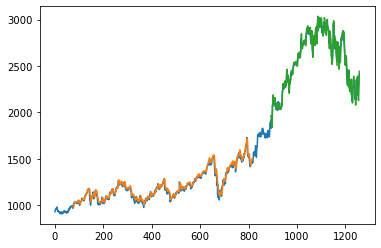

In [193]:
l=75
trainpredictplt = np.empty_like(df1)
trainpredictplt[:,:]=np.nan
trainpredictplt[l:len(train_predict)+l,:]=train_predict
testpredictplt = np.empty_like(df1)
testpredictplt[:,:]=np.nan
testpredictplt[len(train_predict)+(l*2):len(df1)+1,:]=test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredictplt)
plt.plot(testpredictplt)

In [195]:
test_data.size

441

In [196]:
441-75

366

In [198]:
x_input=test_data[366:].reshape(1,-1)

In [199]:
x_input.shape

(1, 75)

In [201]:
temp_input=list(x_input)


In [203]:
temp_input

[array([0.90100687, 0.88417192, 0.9108241 , 0.91281222, 0.91687861,
        0.92921538, 0.92346929, 0.89504726, 0.90501632, 0.93294014,
        0.90846113, 0.87157417, 0.86482691, 0.84153413, 0.80154399,
        0.78804946, 0.80618927, 0.77740662, 0.78412542, 0.80851427,
        0.78682527, 0.75543293, 0.70491383, 0.73941884, 0.70388893,
        0.66132231, 0.70299214, 0.66080986, 0.68159733, 0.69082618,
        0.73301321, 0.67770175, 0.66739106, 0.64294526, 0.65718475,
        0.65126784, 0.64367598, 0.6755096 , 0.65915863, 0.67727471,
        0.63646371, 0.6207533 , 0.60715913, 0.62949343, 0.57501708,
        0.57419621, 0.59750797, 0.64024066, 0.65200805, 0.65293805,
        0.68718684, 0.65699021, 0.68020707, 0.68228534, 0.682366  ,
        0.66034961, 0.62722536, 0.58403716, 0.58705018, 0.61738441,
        0.58175486, 0.5934226 , 0.63280064, 0.63298094, 0.63915408,
        0.69470278, 0.67652502, 0.63808173, 0.63509243, 0.60772377,
        0.60495749, 0.65056559, 0.66315385, 0.70

In [204]:
temp_input=temp_input[0].tolist()

In [205]:
temp_input


[0.9010068706346798,
 0.8841719177042212,
 0.9108240965684785,
 0.9128122153051929,
 0.9168786061342241,
 0.9292153811114486,
 0.9234692909201335,
 0.8950472593379896,
 0.9050163225022775,
 0.9329401381718797,
 0.908461129668995,
 0.8715741724870939,
 0.8648269055572427,
 0.8415341254175525,
 0.8015439948375341,
 0.7880494609778316,
 0.8061892651078043,
 0.7774066201032493,
 0.7841254175523839,
 0.808514272699666,
 0.7868252733070148,
 0.7554329259034315,
 0.7049138323716976,
 0.7394188430003036,
 0.7038889310658972,
 0.6613223124810202,
 0.7029921424233222,
 0.6608098618281203,
 0.6815973276647435,
 0.6908261843303979,
 0.7330132098390526,
 0.6777017537200122,
 0.6673910567871241,
 0.6429452626784088,
 0.6571847479501974,
 0.6512678408745823,
 0.6436759793501367,
 0.6755096037048284,
 0.6591586319465533,
 0.6772747115092622,
 0.6364637109019132,
 0.620753302459763,
 0.6071591254175525,
 0.6294934330397813,
 0.57501708168843,
 0.5741962116610994,
 0.5975079714546007,
 0.640240662010325

In [209]:
from numpy import array

list_output=[]
steps=75
i=0

while i<30:
    
    if len(temp_input)>75:
        x_input=np.array(temp_input[1:]).reshape(1,-1)
        x_input=x_input.reshape(1,steps,1)
        tryone = model.predict(x_input)
        temp_input.extend(tryone[0].tolist())
        temp_input=temp_input[1:]
        list_output.extend(tryone.tolist())
        i=i+1
        
        
    
    elif len(temp_input)==75:
        x_input=x_input.reshape(1,steps,1)
        tryone = model.predict(x_input)
        print (tryone[0])
        temp_input.extend(tryone[0].tolist())
        print(len(temp_input))
        list_output.extend(tryone.tolist())
        i=i+1

print(list_output)

1/1 [==============================] - 0s 172ms/step
[0.7521439]
76
1/1 [==============================] - 0s 32ms/step
[[0.752143919467926], [0.7781432867050171], [0.8043465614318848], [0.8286511301994324], [0.8509946465492249], [0.8720020651817322], [0.8924787640571594], [0.9132333397865295], [0.9349556565284729], [0.9581267237663269], [0.9829817414283752], [1.0095179080963135], [1.0375416278839111], [1.066739797592163], [1.096758246421814], [1.1272764205932617], [1.1580631732940674], [1.1890101432800293], [1.2201383113861084], [1.251586675643921], [1.283581018447876], [1.3163983821868896], [1.35033118724823], [1.3856532573699951], [1.4226014614105225], [1.4613593816757202], [1.5020557641983032], [1.5447633266448975], [1.5895072221755981], [1.6362675428390503]]


In [210]:
list_output=scaler.inverse_transform(list_output)

In [211]:
list_output

array([[2491.81835316],
       [2546.6125396 ],
       [2601.83646515],
       [2653.05882992],
       [2700.1482375 ],
       [2744.42179241],
       [2787.57684483],
       [2831.31752827],
       [2877.09774525],
       [2925.93123287],
       [2978.3136797 ],
       [3034.23918167],
       [3093.2997316 ],
       [3154.83545822],
       [3218.0999395 ],
       [3282.41760193],
       [3347.30129898],
       [3412.52265717],
       [3478.12589401],
       [3544.40395065],
       [3611.832668  ],
       [3680.99591843],
       [3752.50998375],
       [3826.95195297],
       [3904.82103195],
       [3986.50412407],
       [4072.27256416],
       [4162.27960617],
       [4256.57826088],
       [4355.12657188]])

In [219]:
day_new=np.arange(1,76)
day_pred=np.arange(76,106)



In [220]:
len(df1)

1258

In [221]:
1258-75


1183

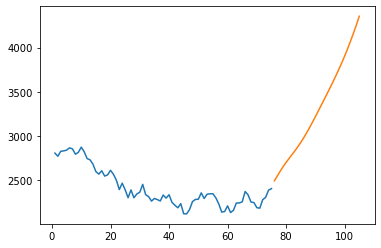

In [222]:
plt.plot(day_new,scaler.inverse_transform(df1[1183:]))
plt.plot(day_pred,list_output)

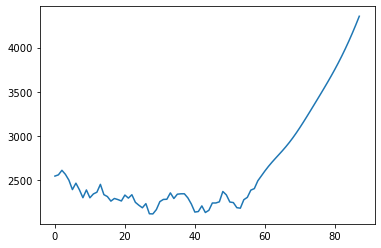

In [228]:
df3=(scaler.inverse_transform(df1)).tolist()
df3.extend(list_output)
plt.plot(df3[1200:])